In [104]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [105]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research/ML', '/home/makoa/School/osrs_research/ML/OSRS/Results', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [106]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [107]:
len(results)

2991

In [108]:
results['Abyssal_whip'].keys()

dict_keys(['buyAndHold', 'numPrices', 'numEpochs', 'sellSignal', 'startLoss', 'buyLimit', 'item', 'numBuys', 'model', 'budget', 'startMAE', 'endMAE', 'numSells', 'persist', 'perfect', 'testPrices', 'endLoss', 'predictions', 'buySignal'])

In [109]:
modelProfs = [(item,results[item]['model']) for item in results ]

In [110]:
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [111]:
pprint(modelProfs[0:10])

[('Unlit_torch', 6.829268292682927),
 ('Royal_crown', 6.713306185607469),
 ('Leather_vambraces', 4.9603174603174605),
 ('Sardine', 4.499812507812175),
 ('Coconut', 4.275536841688379),
 ('Bronze_kiteshield', 3.9946737683089215),
 ('Leather_cowl', 3.9682539682539684),
 ('Spice', 3.7166415564945816),
 ('Bronze_longsword', 3.594249201277955),
 ('Bronze_full_helm', 3.315579227696405)]


In [112]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]

In [113]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [114]:
pprint(modVSpers[0:1000])

[('Unlit_torch', 6.7073170731707314),
 ('Leather_cowl', 4.690476190476191),
 ('Leather_vambraces', 4.523809523809524),
 ('Bronze_kiteshield', 2.5013315579227697),
 ('Sardine', 2.375588517145119),
 ('Empty_fishbowl', 2.3168316831683167),
 ('Redberry_seed', 2.1214642262895174),
 ('Leather_body', 1.8602794411177643),
 ('Empty_sack', 1.7499125043747814),
 ('Dwellberry_seed', 1.7206494587843464),
 ('Bronze_full_helm', 1.5233022636484688),
 ('Leather_chaps', 1.492063492063492),
 ('Bronze_longsword', 1.4073482428115014),
 ('Body_rune', 1.3999766670555491),
 ('Red_beret', 1.3956472445617045),
 ('Skewer_stick', 1.3743227196023096),
 ('Wooden_chair', 1.3515296940611878),
 ('Cadavaberry_seed', 1.2489592006661114),
 ('Master_scroll_book_(empty)', 1.23241341991342),
 ('Marble_magic_wardrobe', 1.201767145048433),
 ('Golovanova_fruit_top', 1.169811320754717),
 ('Iron_med_helm', 1.1105683836589697),
 ('Empty_plant_pot', 1.0793306889770342),
 ('Bronze_scimitar', 1.0548902195608783),
 ('Body_tiara', 1.0

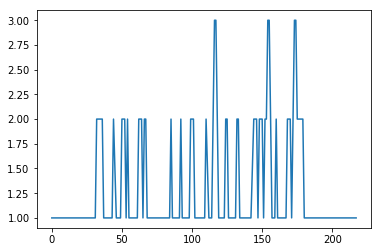

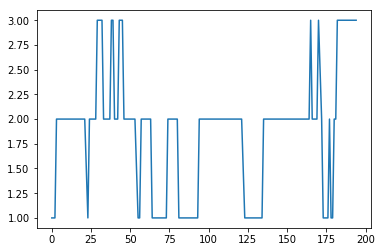

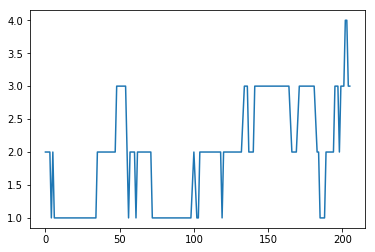

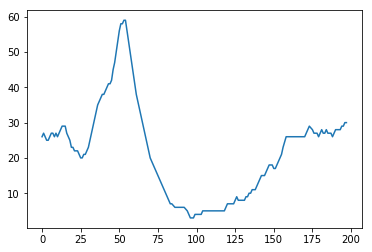

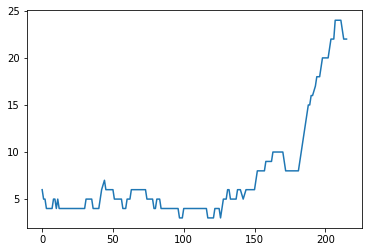

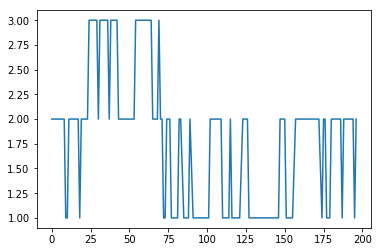

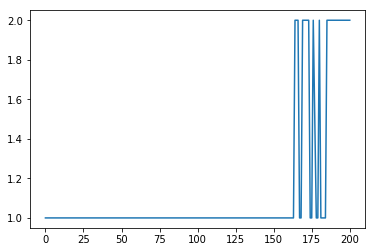

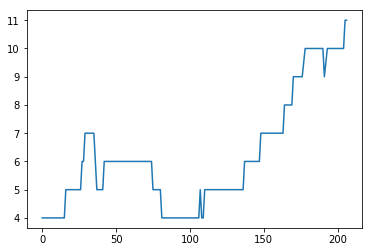

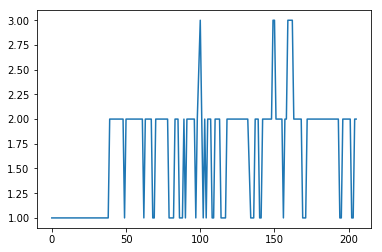

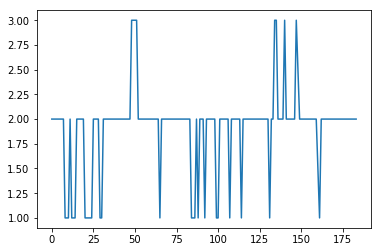

In [115]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

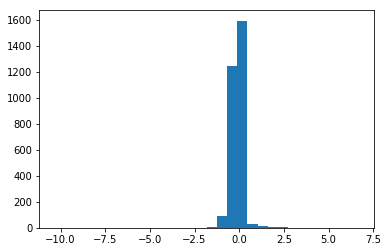

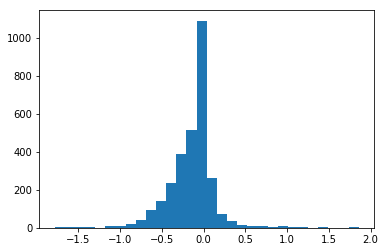

In [116]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

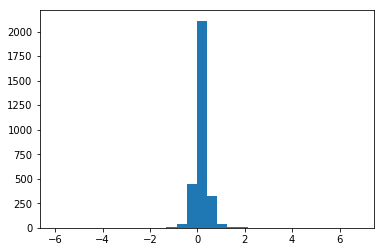

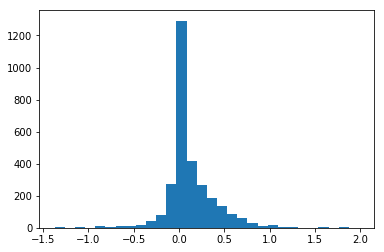

In [117]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [118]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])

In [119]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))

2991
0.4680708793045804
0.21297225008358409
0.6031427616181879


In [120]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]

In [121]:
print(np.corrcoef(prices,profs)[0][1])
print(np.corrcoef(buylimits,profs)[0][1])
print(np.corrcoef(buylimits,prices)[0][1])
print(np.corrcoef(profs,pers)[0][1])
print(np.corrcoef(profs,perf)[0][1])
print(np.corrcoef(profs,bah)[0][1])

-0.009492985135552336
-0.013842925860464362
-0.055232750596067415
0.5842367841001326
0.6803278421374457
0.6191618379376346


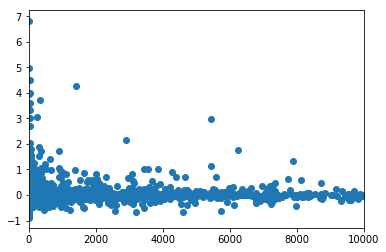

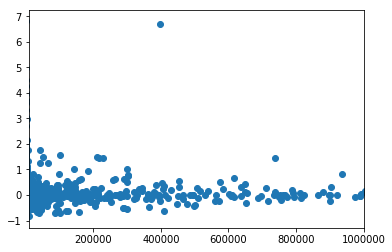

In [122]:
plt.scatter(prices,profs)
plt.xlim(0,10000)
plt.show()
plt.scatter(prices,profs)
plt.xlim(10000,1000000)
plt.show()

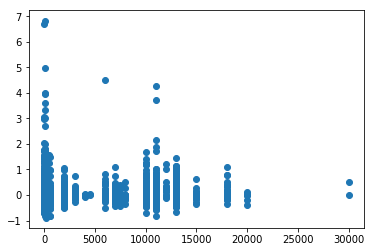

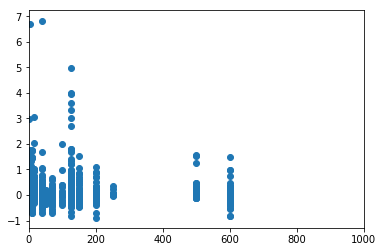

In [123]:
plt.scatter(buylimits,profs)
plt.show()
plt.scatter(buylimits,profs)
plt.xlim(0,1000)
plt.show()

In [124]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

In [125]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)

In [126]:
actualModProfs[0:1000]

[('Royal_crown', 2659375.5458356147),
 ('Occult_ornament_kit', 2638808.3818537463),
 ('Serpentine_helm_(uncharged)', 2038277.48703047),
 ('Staff_of_the_dead', 2029369.0368906506),
 ('Magic_fang', 1973980.9776716707),
 ('Uncharged_toxic_trident', 1967330.2157934003),
 ('Dragon_pickaxe', 1888050.2128767588),
 ('Serpentine_visage', 1795449.8614332667),
 ('Abyssal_dagger', 1702992.6684263782),
 ('Abyssal_dagger_(p++)', 1668737.3866061394),
 ("Pharaoh's_sceptre", 1625449.1740666912),
 ('Toxic_blowpipe_(empty)', 1464424.1720339146),
 ("Rangers'_tunic", 1419349.4100735607),
 ('Old_school_bond', 1394423.903588737),
 ("Ahrim's_armour_set", 1393346.8559555642),
 ("Pharaoh's_sceptre_(3)", 1161868.841229459),
 ('Torture_ornament_kit', 1092325.1678851466),
 ('Holy_sandals', 1069021.6819105272),
 ('Armadyl_godsword_ornament_kit', 1064294.460029216),
 ('Zamorak_godsword', 1060297.7996646643),
 ("Karil's_leathertop", 983136.8938023887),
 ('Archers_ring', 931010.2906130305),
 ('Gilded_armour_set_(sk)',

In [127]:
print(actualModProfsPerDay[0:1000])

[('Occult_ornament_kit', 18977.406557739996), ('Royal_crown', 12210.172386756725), ('Staff_of_the_dead', 9514.15394697914), ('Serpentine_helm_(uncharged)', 9429.921290911265), ('Armadyl_godsword_ornament_kit', 9250.712386173107), ('Magic_fang', 9222.055490173656), ('Uncharged_toxic_trident', 9210.347452216294), ('Abyssal_dagger', 9075.367271123785), ('Serpentine_visage', 8939.2574629488), ('Abyssal_dagger_(p++)', 8907.05837526629), ('Dragon_pickaxe', 8686.681448708345), ("Pharaoh's_sceptre", 8335.636790085597), ('Torture_ornament_kit', 7538.475968841591), ("Rangers'_tunic", 6753.982441463529), ('Uncharged_trident_(e)', 6680.635501775042), ('Toxic_blowpipe_(empty)', 6668.598233305622), ('Old_school_bond', 6455.666220318227), ("Ahrim's_armour_set", 6415.040773276079), ("Monk's_robe_top_(g)", 5607.091564190488), ("Pharaoh's_sceptre_(3)", 5520.8783142288385), ('Staff_of_light', 5262.043364634466), ('Zamorak_godsword', 5078.054596095136), ('Holy_sandals', 4911.654867496104), ('Eternal_boots

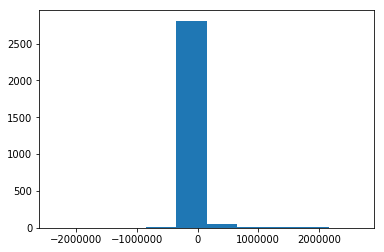

In [128]:
plt.hist([a[1] for a in actualModProfs])
plt.show()